<a href="https://colab.research.google.com/github/Viktor193/innopolis/blob/main/2_3_2_A_B_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%94%D0%97%E2%84%96_10_%D0%9D%D0%B8%D0%BA%D0%B8%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Контекст задачи**

Существует две модели чехлов для автомобиля


1.   **А** - материал "эко-кожа", первая версия;
2.   **В** - выполнили редизайн и предложили более расширеный цветовой ряд.
В результате собрали статистику отзывов

"0" - отзыв отрицательный

"1"- отзыв положительный


**2. Описание гипотезы:**

H0: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) процент положительных отзывов первой версии чехлов (а) и после редизайна(b). 
Уровень доверия установим 95%. Поэтому α = 0,05.

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

Как итог, нам нужна 95% уверенность в том, что выполненный редизайн увеличил количество положительных отзывов до 60%, прежде чем отклонить нулевую гипотезу H0.


**2. Формируем гипотезу**

 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
ad = pd.read_csv('ad.csv')
ad.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1



A - чехлы до редизайна;

B - чехлы после редизайна.

Предприянтое действие:

0 - отрицательный отзыв;

1 - положительный отзыв.

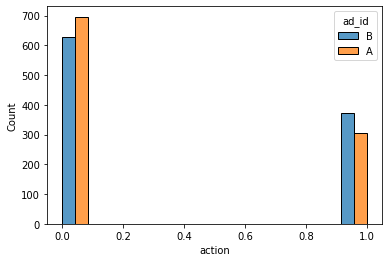

In [8]:
# Распределение данных на гистограмме:
sns.histplot(data=ad, x="action", hue="ad_id", multiple="dodge")

In [14]:
# Жанные по положительным отзывам до и после редизайна:
summary_ad = ad.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum)
summary_ad['total_count'] = ad.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_ad['conversion_rate'] = ad.pivot_table(values='action', index='ad_id') 
summary_ad['std_p'] = ad.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0)) 
summary_ad['se_p'] = ad.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0)) #

In [15]:
summary_ad

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


Количество положительных отзывов о чехлах с редизайном больше, чем до редизайна

Text(0, 0.5, 'Положительные отзывы')

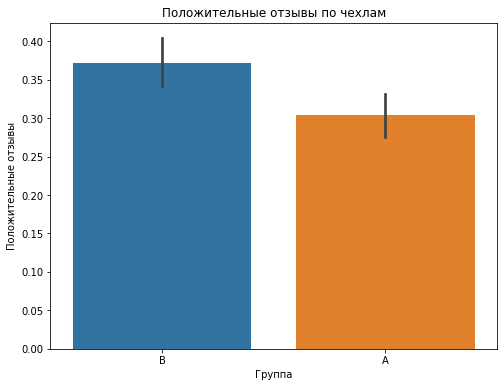

In [20]:
# Гистограмма
plt.figure(figsize=(8,6))
sns.barplot(x=ad['ad_id'], y=ad['action'])
plt.title('Положительные отзывы по чехлам')
plt.xlabel('Группа')
plt.ylabel('Положительные отзывы')

In [21]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ad[ad['ad_id'] == 'A']['action'] # положительные отзывы до редизайна
test_results = ad[ad['ad_id'] == 'B']['action'] # положительные отзывы после редизайна

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# Считаем кол-во элементов в каждой группе:
nobs = [control_results.count(), test_results.count()]
#Считаем кол-во оплат в каждой группе:
successes = [control_results.sum(), test_results.sum()]
z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, зададим ему порог 5% для ошибки первого рода — т.е. согласимся, что 5% наших наблюдений будут ошибочными.

In [23]:
alpha = 0.05
print(pval < alpha)

True


In [24]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)
print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


**Вывод:**

Редизайн чехлов увеличил количетсво положительных отзывов на 10% (итого положительных отзывов 40.96%).

Первоначально цель была 60% - общее количество положительных отзывов.

В результате редизайн пизнан не успешным, так как не достингли показателя по количеству положительных отзывов. 
